<a href="https://colab.research.google.com/github/hedayet13/learning-opencv/blob/master/keras_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from keras.datasets import mnist
(x_train,y_train),(x_test,y_test)= mnist.load_data()

11493376/11490434 [==============================] - 1s 0us/step


In [4]:
import matplotlib.pyplot as plt
x_train.shape

(60000, 28, 28)

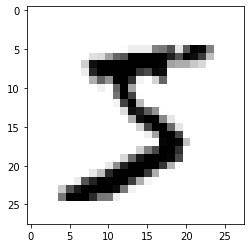

In [9]:
single_image =x_train[0]
plt.imshow(single_image,cmap ='gray_r')

In [10]:
y_train 


array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [11]:
y_train.shape   

(60000,)

In [0]:
from keras.utils.np_utils import to_categorical

In [0]:
y_cat_test = to_categorical(y_test,10)
y_cat_train= to_categorical(y_train,10)

In [17]:
y_cat_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [20]:
single_image.max()

255

In [0]:
x_train = x_train/x_train.max()

In [0]:
x_test = x_test/x_test.max()

In [0]:
scaled_image =x_train[0]

In [24]:
scaled_image

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [25]:
scaled_image.max()

1.0

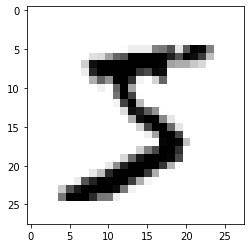

In [26]:
plt.imshow(scaled_image,cmap='gray_r')

In [27]:
x_train.shape

(60000, 28, 28)

In [30]:
x_train =x_train.reshape(60000,28,28,1)
x_train.shape

(60000, 28, 28, 1)

In [32]:
x_test= x_test.reshape(10000,28,28,1)
x_test.shape

(10000, 28, 28, 1)

In [0]:
from keras.models import Sequential
from keras.layers import Dense,Conv2D,MaxPool2D,Flatten

In [0]:
model = Sequential()

model.add(Conv2D(filters=32,kernel_size=(4,4),input_shape=(28,28,1),activation='relu'))

model.add(MaxPool2D(pool_size=(2,2)))

# 2d to 1d
model.add(Flatten())

model.add(Dense(128,activation='relu'))

model.add(Dense(10,activation='softmax'))

model.compile(loss= 'categorical_crossentropy',
              optimizer = 'rmsprop',
              metrics = ['accuracy'])

In [38]:
model.summary()


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 25, 25, 32)        544       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 4608)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               589952    
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1290      
Total params: 591,786
Trainable params: 591,786
Non-trainable params: 0
_________________________________________________________________


In [39]:
model.fit(x_train,y_cat_train,epochs=2)

Epoch 1/2
60000/60000 [==============================] - 31s 510us/step - loss: 0.1316 - accuracy: 0.9604
Epoch 2/2
60000/60000 [==============================] - 30s 493us/step - loss: 0.0469 - accuracy: 0.9865


In [40]:
model.metrics_names

['loss', 'accuracy']

In [43]:
model.evaluate(x_test,y_cat_test)

10000/10000 [==============================] - 1s 136us/step


[0.048853666300885376, 0.9846000075340271]

In [0]:
from sklearn.metrics import classification_report
predictions = model.predict_classes(x_test)

In [45]:
y_cat_test

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [46]:
predictions

array([7, 2, 1, ..., 4, 5, 6])

In [47]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [48]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98       980
           1       0.99      1.00      1.00      1135
           2       0.99      0.97      0.98      1032
           3       0.99      0.99      0.99      1010
           4       0.98      0.99      0.99       982
           5       0.99      0.98      0.98       892
           6       1.00      0.97      0.99       958
           7       0.97      0.99      0.98      1028
           8       0.98      0.98      0.98       974
           9       0.99      0.97      0.98      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000

